In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.datasets import load_digits
mnist = load_digits()

mnist.data.shape

(1797, 64)

In [3]:
images = mnist.images
labels = mnist.target
data_size = len(images)

In [4]:
images = images.reshape(data_size, -1)
images = scale(images)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.25)

### Support Vector Machine -- Linear Kernel

In [6]:
SVM_Linear = SVC(kernel='linear',gamma=0.001)

SVM_Linear.fit(X_train, Y_train)

SVC(gamma=0.001, kernel='linear')

In [7]:
pred_SVM_linear = SVM_Linear.predict(X_test)

In [8]:
print(classification_report(Y_test, pred_SVM_linear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       1.00      1.00      1.00        46
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        35
           5       0.96      1.00      0.98        51
           6       1.00      1.00      1.00        47
           7       1.00      0.98      0.99        43
           8       0.93      0.97      0.95        40
           9       0.93      0.93      0.93        42

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Confusion Matrix :


<AxesSubplot: >

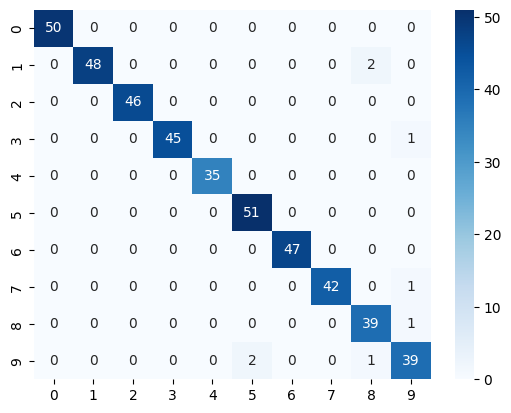

In [9]:
print("Confusion Matrix :")
sns.heatmap(
    confusion_matrix(Y_test, pred_SVM_linear),
    annot=True,
    cmap='Blues')

In [10]:
index = 0
misclassified_images = []
for label, predict in zip(Y_test, pred_SVM_linear):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

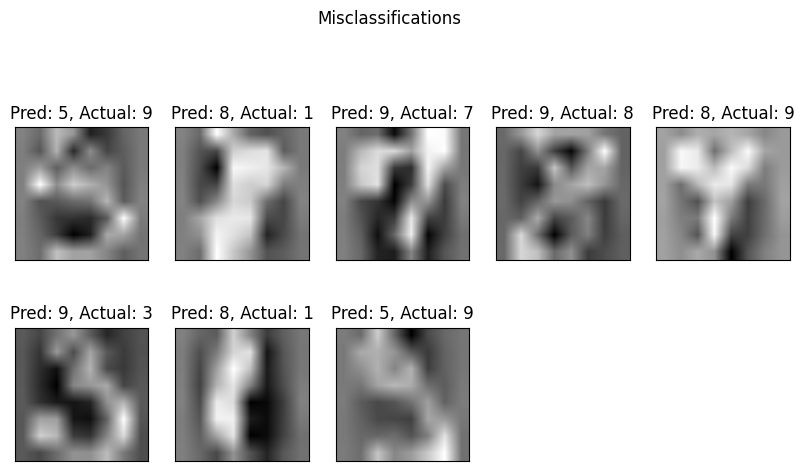

In [11]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_xticks(()) 
    p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {pred_SVM_linear[bad_index]}, Actual: {Y_test[bad_index]}')

### Support Vector Machine -- RBF Kernel 

In [12]:
SVM_RBF = SVC(kernel='rbf',gamma=0.001)

SVM_RBF.fit(X_train, Y_train)

SVC(gamma=0.001)

In [13]:
pred_SVM_rbf = SVM_RBF.predict(X_test)

In [14]:
print(classification_report(Y_test, pred_SVM_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.86      0.84      0.85        50
           2       0.98      0.91      0.94        46
           3       0.98      0.91      0.94        46
           4       0.95      1.00      0.97        35
           5       0.98      0.96      0.97        51
           6       1.00      0.98      0.99        47
           7       0.89      0.98      0.93        43
           8       0.90      0.93      0.91        40
           9       0.82      0.86      0.84        42

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



Confusion Matrix :


<AxesSubplot: >

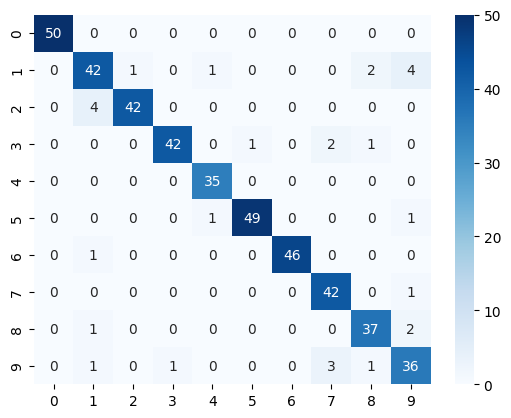

In [15]:
print("Confusion Matrix :")
sns.heatmap(
    confusion_matrix(Y_test, pred_SVM_rbf),
    annot=True,
    cmap='Blues')

In [16]:
index = 0
misclassified_images = []
for label, predict in zip(Y_test, pred_SVM_rbf):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

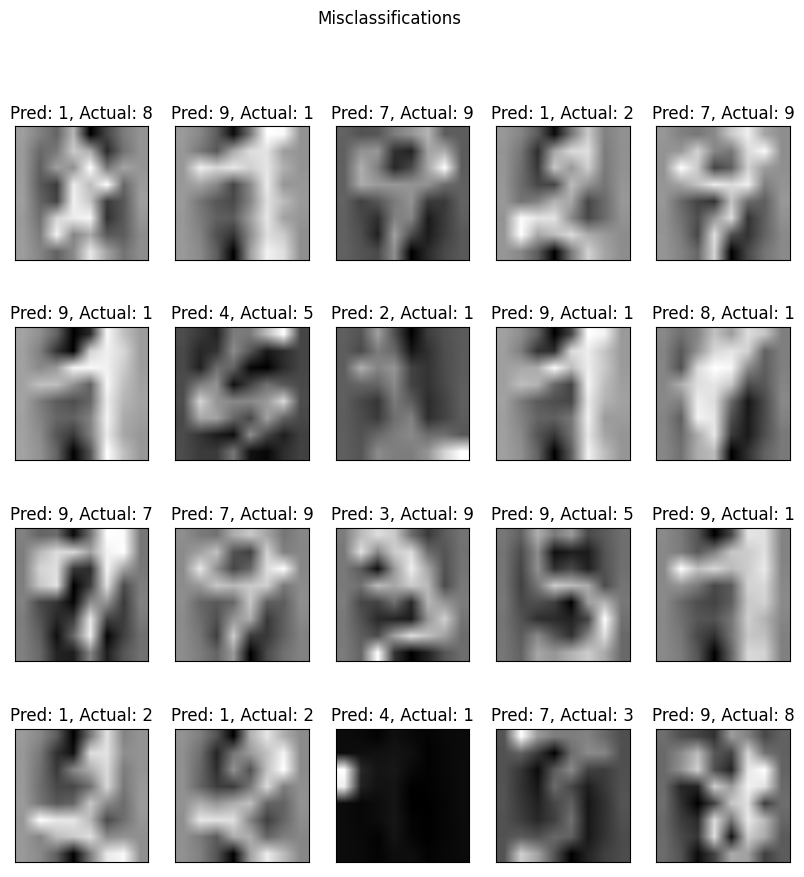

In [17]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_xticks(()) 
    p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {pred_SVM_rbf[bad_index]}, Actual: {Y_test[bad_index]}')

### Logistic Regression 

In [18]:
Log_reg = LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l2', solver='saga', max_iter=10000, C=50)

Log_reg.fit(X_train, Y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [19]:
pred_logreg = Log_reg.predict(X_test)

In [20]:
print(classification_report(Y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      0.92      0.95        50
           2       1.00      1.00      1.00        46
           3       0.96      0.98      0.97        46
           4       0.97      1.00      0.99        35
           5       0.93      0.98      0.95        51
           6       1.00      0.98      0.99        47
           7       0.98      0.98      0.98        43
           8       0.93      0.93      0.93        40
           9       0.93      0.93      0.93        42

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



Confusion Matrix :


<AxesSubplot: >

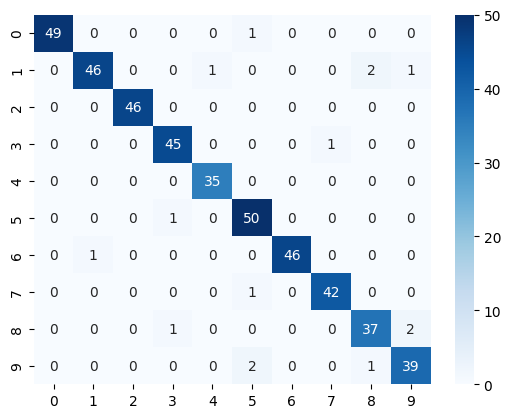

In [21]:
print("Confusion Matrix :")
sns.heatmap(
    confusion_matrix(Y_test, pred_logreg),
    annot=True,
    cmap='Blues')

In [22]:
index = 0
misclassified_images = []
for label, predict in zip(Y_test, pred_logreg):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

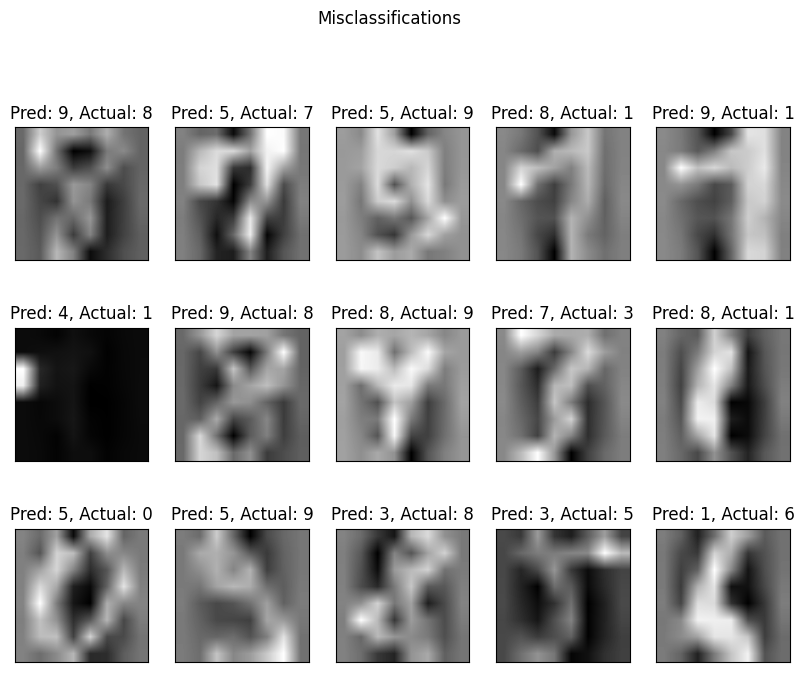

In [23]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_xticks(()) 
    p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {pred_logreg[bad_index]}, Actual: {Y_test[bad_index]}')